In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

In [55]:
file = pd.read_csv('C:/Users/hriti/OneDrive/Hritik/OneDrive/Downloads/HF_tf_normalized_mixed.csv')

In [56]:
file.head(10)

,Length,Info,Transmission Rate (per 1000 ms),Reception Rate (per 1000 ms),TR / RR,Sources Count Per Sec,Destinations Count Per Sec,Trans Total Duration Per Sec,Rcv Total Duration Per Sec,Trans Average Per Sec,Rcv Average Per Sec,DAO,DIS,DIO,Label
0,0.0,0.458711,0.385363,0.468181,0.364049,0.385117,0.468436,0.396105,0.576483,0.583196,0.597972,0.0,0.54597,0.0,1
1,0.0,0.458711,0.385363,0.468181,0.364049,0.385117,0.468436,0.396105,0.576483,0.583196,0.597972,0.0,0.54597,0.0,1
2,0.0,0.458711,0.385363,0.468181,0.364049,0.385117,0.468436,0.396105,0.576483,0.583196,0.597972,0.0,0.54597,0.0,1
3,0.0,0.458711,0.385363,0.468181,0.364049,0.385117,0.468436,0.396105,0.576483,0.583196,0.597972,0.0,0.54597,0.0,1
4,0.0,0.458711,0.385363,0.468181,0.364049,0.385117,0.468436,0.396105,0.576483,0.583196,0.597972,0.0,0.54597,0.0,1
5,0.0,0.458711,0.385363,0.468181,0.364049,0.385117,0.468436,0.396105,0.576483,0.583196,0.597972,0.0,0.54597,0.0,1
6,0.0,0.458711,0.385363,0.468181,0.364049,0.385117,0.468436,0.396105,0.576483,0.583196,0.597972,0.0,0.54597,0.0,1
7,0.0,0.458711,0.385363,0.468181,0.364049,0.385117,0.468436,0.396105,0.576483,0.583196,0.597972,0.0,0.54597,0.0,1
8,0.0,0.458711,0.385363,0.468181,0.364049,0.385117,0.468436,0.396105,0.576483,0.583196,0.597972,0.0,0.54597,0.0,1
9,0.0,0.458711,0.385363,0.468181,0.364049,0.385117,0.468436,0.396105,0.576483,0.583196,0.597972,0.0,0.54597,0.0,1


In [57]:
count=file["Label"].value_counts()
count

1    2244415
0    1129448
Name: Label, dtype: int64

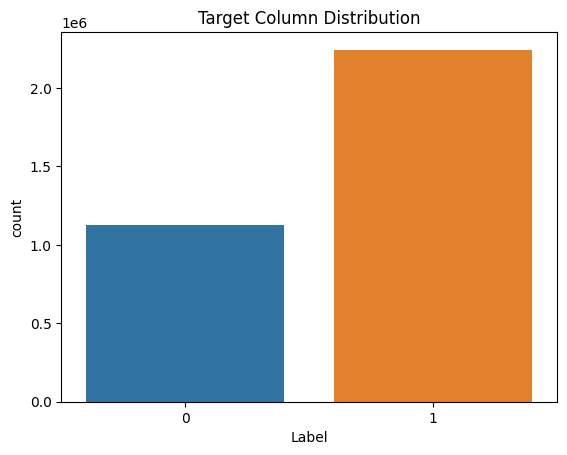

In [58]:
sns.countplot(x='Label', data=file)

# Add a title and display the plot
plt.title('Target Column Distribution')
plt.show()

In [59]:
diff = count.max() - count.min()
diff

1114967

<AxesSubplot:ylabel='Label'>

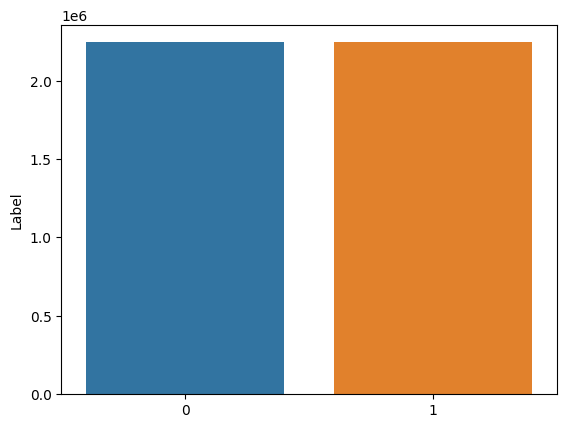

In [60]:
# Split the dataset into features and target
X = file.drop('Label', axis=1)
y = file['Label']

# Apply over-sampling
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
ax = y_resampled.value_counts()
sns.barplot(x = [0, 1], y = ax)

In [61]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [62]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(file)
scaled_data = scaler.transform(file)
scaled_data

array([[-0.73399198, -0.10995425, -1.21152223, ...,  0.73128291,
        -0.42707027,  0.70938425],
       [-0.73399198, -0.10995425, -1.21152223, ...,  0.73128291,
        -0.42707027,  0.70938425],
       [-0.73399198, -0.10995425, -1.21152223, ...,  0.73128291,
        -0.42707027,  0.70938425],
       ...,
       [ 0.9791072 , -1.91590081, -2.21680473, ..., -1.27926329,
        -0.42707027, -1.40967326],
       [ 0.9791072 , -1.91590081, -2.32523882, ..., -1.27926329,
        -0.42707027, -1.40967326],
       [ 0.9791072 , -1.91590081, -1.93255347, ..., -1.27926329,
        -0.42707027, -1.40967326]])

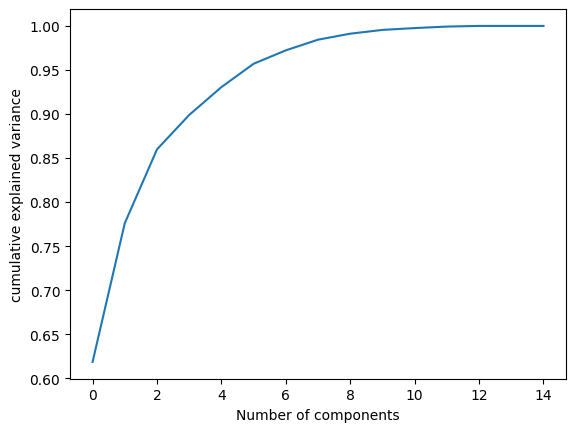

In [63]:
pca = PCA()
pca.fit(file)
cumvar = (np.cumsum(pca.explained_variance_ratio_))
plt.plot(cumvar)

plt.xlabel('Number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [64]:
#for 95% variance
n_components_95 = np.argmax(cumvar >= 0.95) + 1
n_components_95


6

In [65]:
#for 99% variance
n_components_99 = np.argmax(cumvar >= 0.99) + 1
n_components_99

9

In [66]:
pca = PCA(n_components=n_components_95)
pca.fit(file)

PCA(n_components=6)

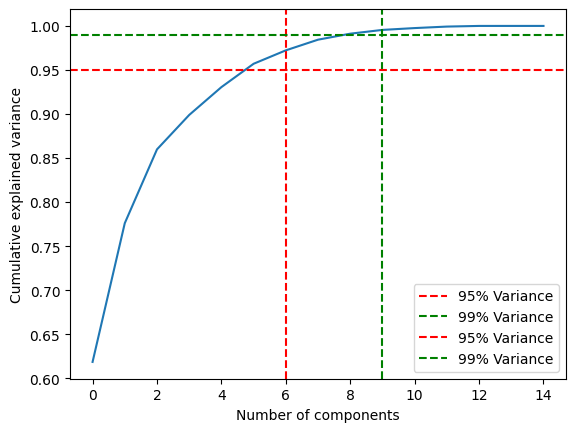

In [67]:
plt.plot(cumvar)
# Mark the number of components required to explain 95% and 99% of the variance
plt.axvline(x=n_components_95, color='r', linestyle='--', label='95% Variance')
plt.axvline(x=n_components_99, color='g', linestyle='--', label='99% Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.axhline(y=0.99, color='g', linestyle='--', label='99% Variance')

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.legend(loc='best')
plt.show()

In [68]:
'''
For 95% variance we have to take 6 components 
for 6 components we are finding data loss, the code is given below
'''
pca = PCA(n_components=6)
pca.fit(file)

# Calculate the amount of data lost
data_lost = 1 - pca.explained_variance_ratio_.sum()

print("Data lost: {:.2f}%".format(100 * data_lost))

Data lost: 4.30%


In [69]:
'''
For 99% variance we have to take 9 components 
for 9 components we are finding data loss, the code is given below
'''
pca = PCA(n_components=9)
pca.fit(file)

# Calculate the amount of data lost
data_lost = 1 - pca.explained_variance_ratio_.sum()

print("Data lost: {:.2f}%".format(100 * data_lost))

Data lost: 0.88%


In [70]:
#Feature extraction method
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
scaled_data.shape

(3373863, 15)

In [71]:
x_pca.shape

(3373863, 6)

In [72]:
x_pca

array([[-1.307649  ,  1.6153883 , -1.10442553,  1.95032622, -0.15093693,
         0.21949336],
       [-1.307649  ,  1.6153883 , -1.10442553,  1.95032622, -0.15093693,
         0.21949336],
       [-1.307649  ,  1.6153883 , -1.10442553,  1.95032622, -0.15093693,
         0.21949336],
       ...,
       [ 4.38664112,  3.19926675,  2.0971309 ,  3.38733662, -0.13188011,
        -0.81357761],
       [ 3.16163192,  3.68210486,  5.05770686,  2.12041285,  0.92420825,
        -1.09948522],
       [ 4.30641839,  2.8989893 ,  2.27292132,  3.1345696 , -0.05864616,
        -0.87801326]])

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import time

In [75]:
''''
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(x_pca, y, test_size=0.2, random_state=0)

# Create a list to store the accuracy for different values of k
accuracies = []

# Loop over different values of k
for k in range(1, 9):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    accuracy = knn.score(X_val, y_val)
    accuracies.append(accuracy)

# Plot the accuracy versus k
plt.plot(range(1, 9), accuracies)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy versus Number of Neighbors (k)')
plt.show()

SyntaxError: incomplete input (3282771442.py, line 1)

In [81]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a K-NN classifier
knn = KNeighborsClassifier(n_neighbors=9)

# Get the current time
start_time = time.time()

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Get the training time
training_time = time.time() - start_time

# Get the current time
start_time = time.time()

# Get predictions for the test set
y_pred = knn.predict(X_test)

# Get the testing time
testing_time = time.time() - start_time

print("Training time: ", training_time)
print("Testing time: ", testing_time)

Training time:  16.31136441230774
Testing time:  331.5478205680847


In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [83]:
# Get predictions for the test set
y_pred = knn.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute the precision
precision = precision_score(y_test, y_pred, average='weighted')

# Compute the recall
recall = recall_score(y_test, y_pred, average='weighted')

# Compute the F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Accuracy:  0.9998888515100633
Precision:  0.9998888507816992
Recall:  0.9998888515100633
F1-score:  0.9998888505909042


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [80]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9989418663758034
